# A Comprehensive Tutorial on Scikit-Learn

![Scikit-Learn Logo](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

Welcome to this in-depth guide to Scikit-Learn, the most popular and powerful machine learning library for Python. This notebook will walk you through the essential concepts and functionalities of sklearn, from the basics of data handling to building, evaluating, and deploying machine learning models.

## 📘 1. Introduction to Scikit-Learn

### What is Scikit-Learn?

Scikit-learn (often stylized as `sklearn`) is an open-source Python library that provides a wide array of tools for machine learning tasks. It's built upon other fundamental scientific Python libraries like NumPy, SciPy, and Matplotlib.

The core philosophy of scikit-learn is to offer **simple and efficient tools for data mining and data analysis** that are **accessible to everybody, and reusable in various contexts**.

### Features of Scikit-Learn

Scikit-learn provides a consistent and unified API for various machine learning tasks:

- **Classification**: Identifying which category an object belongs to (e.g., spam vs. not spam).
- **Regression**: Predicting a continuous-valued attribute associated with an object (e.g., predicting house prices).
- **Clustering**: Automatic grouping of similar objects into sets (e.g., customer segmentation).
- **Dimensionality Reduction**: Reducing the number of random variables to consider (e.g., PCA, feature selection).
- **Model Selection**: Comparing, validating, and choosing parameters and models (e.g., grid search, cross-validation).
- **Preprocessing**: Feature extraction and normalization (e.g., scaling, encoding).

### Installation and Imports

You can install scikit-learn using pip. It's also included in the Anaconda distribution.

```bash
pip install -U scikit-learn
```

Let's start by importing the essential libraries we'll use throughout this tutorial.

In [2]:
# Standard library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
sns.set_style("whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


### Dataset Structure in Scikit-Learn

Scikit-learn comes with several toy datasets. These datasets are stored in a `Bunch` object, which is similar to a dictionary. The most important attributes are:
- `data`: The feature matrix, usually a NumPy array. By convention, this is named `X`.
- `target`: The target vector (labels or values), usually a NumPy array. By convention, this is named `y`.
- `feature_names`: The names of the columns in `X`.
- `target_names`: The names of the classes in `y` (for classification).
- `DESCR`: A full description of the dataset.

In [4]:
# Load the Iris dataset as an example
from sklearn.datasets import load_iris

iris = load_iris()

# Explore the Bunch object
print(f"Keys of the iris Bunch object: {iris.keys()}\n")

# Print the dataset description
# print(iris.DESCR)

# Assign features to X and target to y
X, y = iris.data, iris.target

print(f"Shape of feature matrix X: {X.shape}")
print(f"Shape of target vector y: {y.shape}\n")

print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")

Keys of the iris Bunch object: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Shape of feature matrix X: (150, 4)
Shape of target vector y: (150,)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


---

## 🧹 2. Data Preparation

Data preparation (or preprocessing) is a critical step in any machine learning pipeline. Scikit-learn provides excellent tools to get your data ready for modeling.

### Loading Built-in Datasets

In [6]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer

digits = load_digits()
wine = load_wine()
cancer = load_breast_cancer()

print(f"Digits dataset has {digits.data.shape[0]} samples and {digits.data.shape[1]} features.")
print(f"Wine dataset has {wine.data.shape[0]} samples and {wine.data.shape[1]} features.")
print(f"Breast Cancer dataset has {cancer.data.shape[0]} samples and {cancer.data.shape[1]} features.")

Digits dataset has 1797 samples and 64 features.
Wine dataset has 178 samples and 13 features.
Breast Cancer dataset has 569 samples and 30 features.


### Splitting Data: `train_test_split`

We must split our data into a training set and a testing set. The model learns from the training set and its performance is evaluated on the unseen testing set.

- `test_size`: The proportion of the dataset to allocate to the test split.
- `random_state`: A seed for the random number generator to ensure reproducibility.
- `stratify`: Ensures that the class distribution in the original dataset is preserved in both the train and test sets (very important for classification).

In [8]:
from sklearn.model_selection import train_test_split

# Using the breast cancer dataset for this example
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}\n")

print(f"Original class distribution: {np.bincount(y) / len(y)}")
print(f"Training class distribution: {np.bincount(y_train) / len(y_train)}")
print(f"Test class distribution: {np.bincount(y_test) / len(y_test)}")

Shape of X_train: (398, 30)
Shape of X_test: (171, 30)
Shape of y_train: (398,)
Shape of y_test: (171,)

Original class distribution: [0.37258348 0.62741652]
Training class distribution: [0.3718593 0.6281407]
Test class distribution: [0.37426901 0.62573099]


### Feature Scaling

Many algorithms (like SVMs, KNN, and Logistic Regression) perform better when features are on a similar scale. **Important:** We fit the scaler on the training data *only* and then use it to transform both the training and test data.

- **`StandardScaler`**: Scales features to have a mean of 0 and a standard deviation of 1.
- **`MinMaxScaler`**: Scales features to a given range, typically [0, 1].

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Using the wine dataset as it has features with different scales
X_wine, y_wine = load_wine(return_X_y=True)
X_train_w, X_test_w, _, _ = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_w)
X_test_scaled = scaler.transform(X_test_w) # Use the same scaler fitted on training data

print("StandardScaler Example:")
print(f"Original training data mean: {X_train_w.mean():.2f}")
print(f"Scaled training data mean: {X_train_scaled.mean():.2f}\n")

# MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_w)
X_test_minmax = min_max_scaler.transform(X_test_w)

print("MinMaxScaler Example:")
print(f"Scaled training data min: {X_train_minmax.min():.2f}")
print(f"Scaled training data max: {X_train_minmax.max():.2f}")

StandardScaler Example:
Original training data mean: 68.47
Scaled training data mean: 0.00

MinMaxScaler Example:
Scaled training data min: 0.00
Scaled training data max: 1.00


### Encoding Categorical Features

Machine learning models require numerical input. We need to convert categorical text data into numbers.

- **`LabelEncoder`**: Converts each category into an integer. Best used for the target variable (`y`).
- **`OneHotEncoder`**: Creates a new binary column for each category. This prevents the model from assuming an ordinal relationship between categories. Best used for features (`X`).

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example data
df = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'green', 'red'],
    'size': ['S', 'M', 'L', 'S', 'M'],
    'label': ['class1', 'class2', 'class1', 'class2', 'class1']
})

# LabelEncoder for the target variable
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
print("LabelEncoder Output:")
print(df[['label', 'label_encoded']])
print(f"Classes found by LabelEncoder: {le.classes_}\n")

# OneHotEncoder for features
ohe = OneHotEncoder(sparse_output=False) # sparse_output=False returns a numpy array
encoded_features = ohe.fit_transform(df[['color', 'size']])
print("OneHotEncoder Output Shape:")
print(encoded_features.shape)
print("\nOneHotEncoder Categories:")
print(ohe.categories_)
print("\nOneHotEncoder Example Output (first row):")
print(encoded_features[0])

LabelEncoder Output:
    label  label_encoded
0  class1              0
1  class2              1
2  class1              0
3  class2              1
4  class1              0
Classes found by LabelEncoder: ['class1' 'class2']

OneHotEncoder Output Shape:
(5, 6)

OneHotEncoder Categories:
[array(['blue', 'green', 'red'], dtype=object), array(['L', 'M', 'S'], dtype=object)]

OneHotEncoder Example Output (first row):
[0. 0. 1. 0. 0. 1.]


### Pipelines

A `Pipeline` allows you to chain multiple processing steps (like scaling and modeling) into a single estimator. This is extremely useful because:
1.  It simplifies your code.
2.  It prevents data leakage by ensuring that steps like scaling are fitted only on the training data during cross-validation.

`make_pipeline` is a convenient function to create a pipeline without having to name each step.

In [15]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC

# We'll use the cancer dataset again
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a scaler and a classifier
# Method 1: Using Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Scale the data
    ('svm', SVC(random_state=42))       # Step 2: Apply the SVM classifier
])

# Method 2: Using make_pipeline (more concise)
pipe_simple = make_pipeline(StandardScaler(), SVC(random_state=42))

# Now, we can treat the entire pipeline as a single estimator
pipe.fit(X_train, y_train)

# Evaluate the pipeline on the test data
score = pipe.score(X_test, y_test)
print(f"Pipeline score on test data: {score:.3f}")

Pipeline score on test data: 0.977


---

## 🔍 3. Exploratory Data Analysis (EDA)

Before building models, it's crucial to understand your data. EDA helps you discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

### Summary Statistics

Pandas DataFrames are excellent for this. The `.describe()` method gives a great overview of the numerical features.

In [17]:
# Load the wine dataset into a pandas DataFrame for easier EDA
wine_data = load_wine()
df_wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df_wine['target'] = wine_data.target

print("First 5 rows of the Wine DataFrame:")
display(df_wine.head())

print("\nSummary statistics:")
display(df_wine.describe())

First 5 rows of the Wine DataFrame:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Summary statistics:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### Visualizations

Visualizations are key to understanding relationships in the data.

#### `seaborn.pairplot()`

This function creates a grid of scatterplots for each pair of features and histograms for each individual feature. It's a fantastic way to spot relationships at a glance.

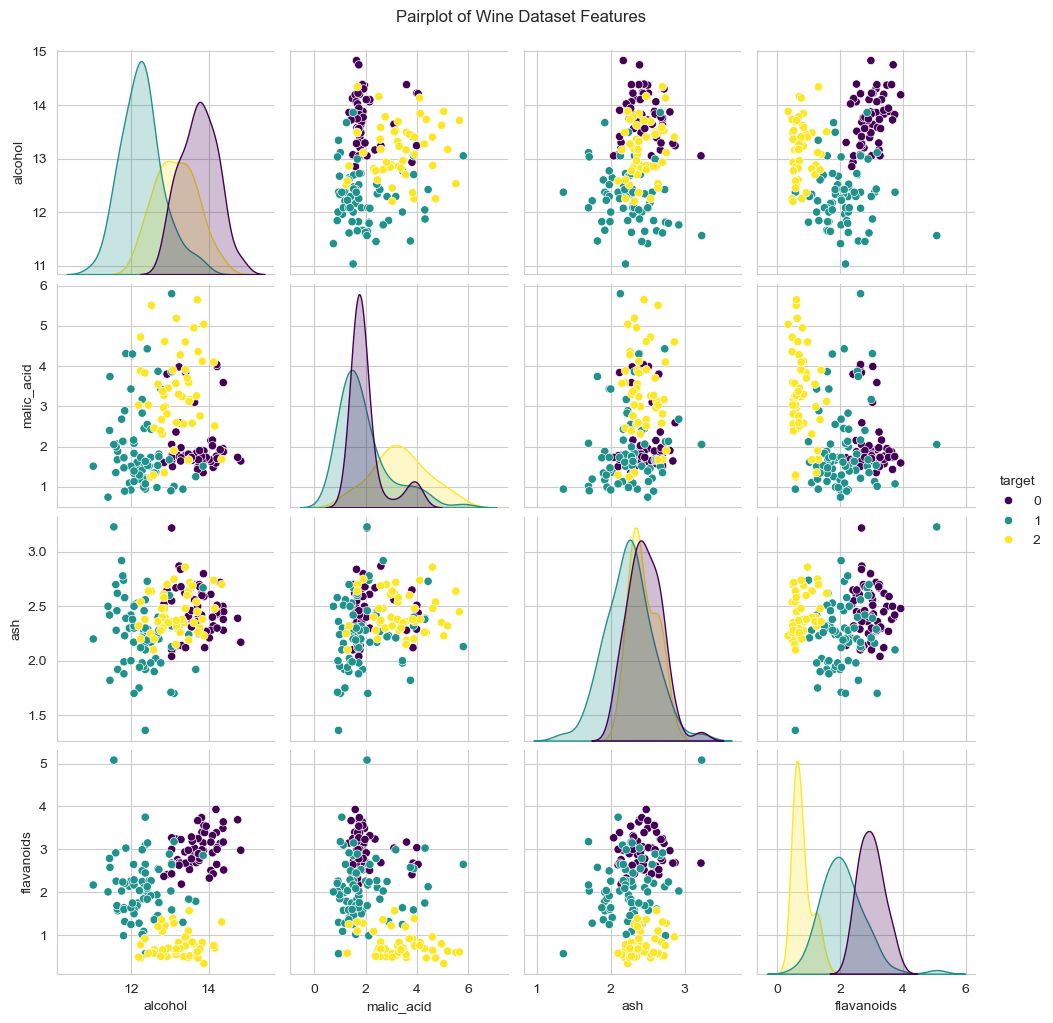

In [19]:
# Using a subset of columns for clarity
cols_to_plot = ['alcohol', 'malic_acid', 'ash', 'flavanoids', 'target']
sns.pairplot(df_wine[cols_to_plot], hue='target', palette='viridis')
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()

#### Correlation Heatmap

A heatmap helps visualize the correlation matrix, showing which features are correlated with each other and with the target variable.

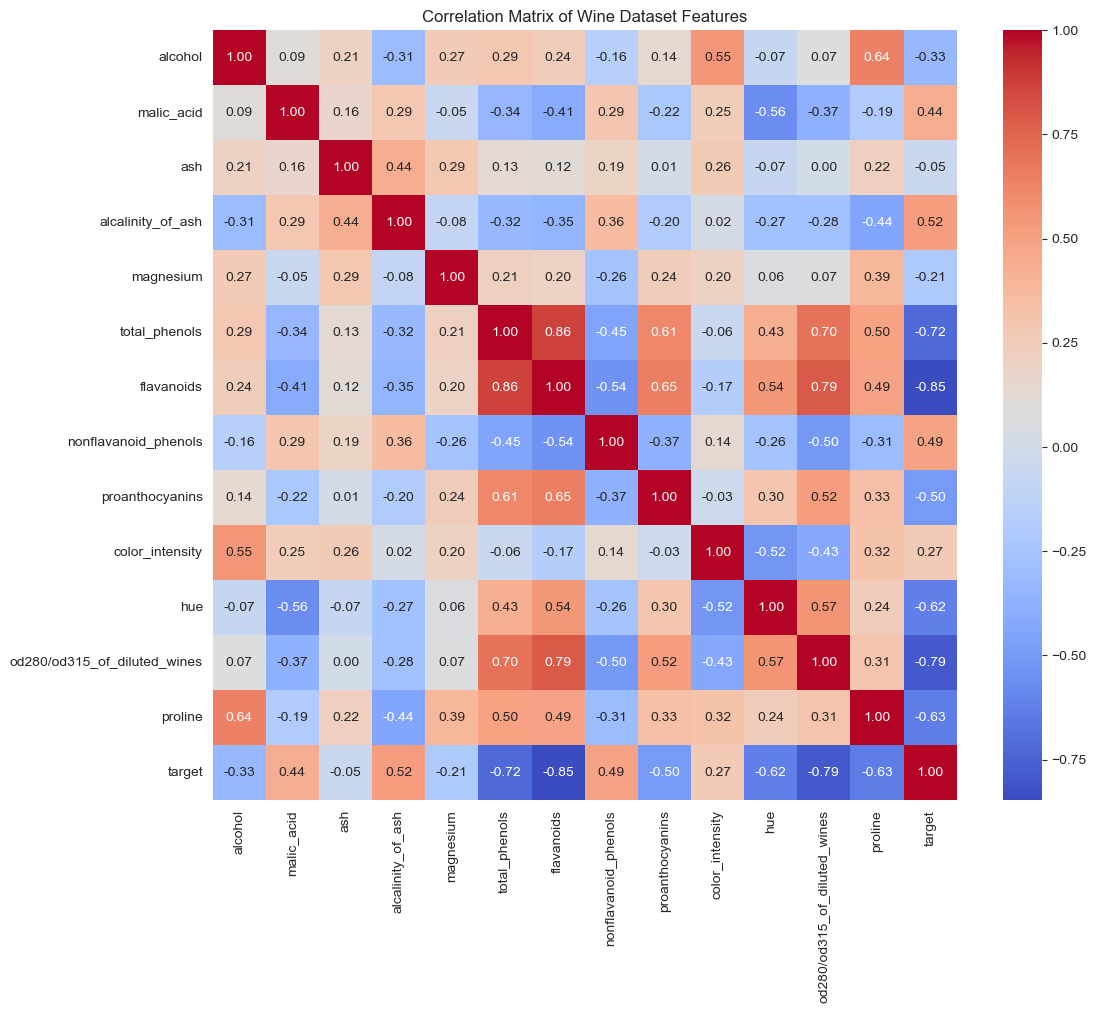

In [20]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_wine.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

#### Class Distribution

It's important to know if your dataset is balanced or imbalanced.

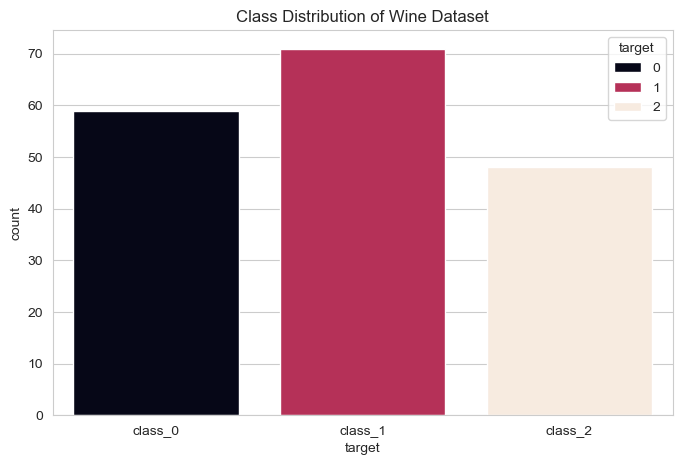

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df_wine, palette='rocket', hue='target')
plt.title('Class Distribution of Wine Dataset')
plt.xticks(ticks=[0, 1, 2], labels=wine_data.target_names)
plt.show()

#### Feature Importance

Tree-based models (like Random Forest) can provide feature importances, which tell you which features were most influential in the model's predictions. This is a form of post-modeling EDA.

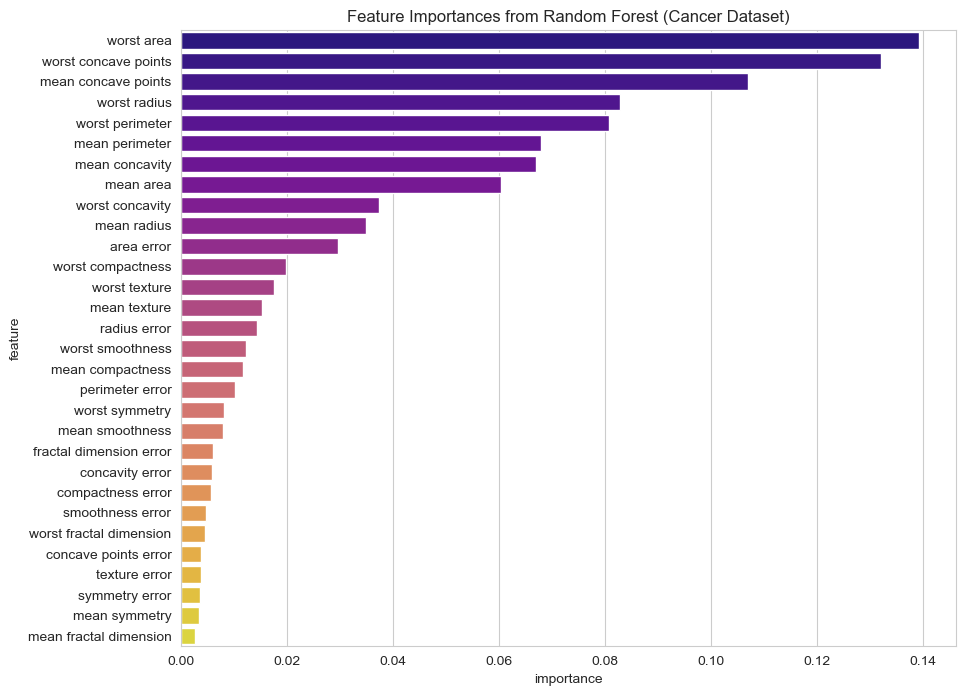

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Using the cancer dataset
X_cancer, y_cancer = cancer.data, cancer.target
feature_names_cancer = cancer.feature_names

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_cancer, y_cancer)

importances = forest.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names_cancer, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='plasma', hue='feature')
plt.title('Feature Importances from Random Forest (Cancer Dataset)')
plt.show()

---

## 🧠 4. Supervised Learning

Supervised learning involves learning a function that maps an input to an output based on example input-output pairs. We'll cover both classification and regression.

The standard scikit-learn API for estimators is:
1. **Choose a model**: `from sklearn.family import Model`
2. **Instantiate the model**: `model = Model(hyperparameters)`
3. **Fit the model to data**: `model.fit(X_train, y_train)`
4. **Predict on new data**: `y_pred = model.predict(X_test)`
5. **Evaluate the model**: `score = model.score(X_test, y_test)`

### 🟢 Classification

Classification is the task of predicting a discrete class label. We'll use the **Breast Cancer dataset** for these examples.

In [33]:
# Prepare data for classification models
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

# We'll use a pipeline to ensure data is scaled for each model
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

scaler = StandardScaler()
X_train_scaled_c = scaler.fit_transform(X_train_c)
X_test_scaled_c = scaler.transform(X_test_c)

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train_scaled_c, y_train_c)
y_pred_lr = log_reg.predict(X_test_scaled_c)
print(f"Logistic Regression Accuracy: {log_reg.score(X_test_scaled_c, y_test_c):.3f}")

Logistic Regression Accuracy: 0.988


#### K-Nearest Neighbors (KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_c, y_train_c)
y_pred_knn = knn.predict(X_test_scaled_c)
print(f"KNN Accuracy: {knn.score(X_test_scaled_c, y_test_c):.3f}")

KNN Accuracy: 0.959


#### Decision Trees
Note: Decision Trees (and Random Forests) do not require feature scaling.

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_c, y_train_c) # Using unscaled data
y_pred_tree = tree_clf.predict(X_test_c)
print(f"Decision Tree Accuracy: {tree_clf.score(X_test_c, y_test_c):.3f}")

Decision Tree Accuracy: 0.918


#### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c) # Using unscaled data
y_pred_rf = rf_clf.predict(X_test_c)
print(f"Random Forest Accuracy: {rf_clf.score(X_test_c, y_test_c):.3f}")

Random Forest Accuracy: 0.936


#### Support Vector Machines (SVM)

In [43]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42, probability=True) # probability=True for ROC curve
svm_clf.fit(X_train_scaled_c, y_train_c)
y_pred_svm = svm_clf.predict(X_test_scaled_c)
print(f"SVM Accuracy: {svm_clf.score(X_test_scaled_c, y_test_c):.3f}")

SVM Accuracy: 0.977


#### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled_c, y_train_c)
y_pred_nb = nb_clf.predict(X_test_scaled_c)
print(f"Naive Bayes Accuracy: {nb_clf.score(X_test_scaled_c, y_test_c):.3f}")

Naive Bayes Accuracy: 0.936


### ✅ Evaluation Metrics (Classification)

Accuracy isn't always the best metric, especially with imbalanced datasets. Here are some more robust alternatives.

- **Accuracy**: (TP+TN) / (TP+TN+FP+FN). The percentage of correct predictions.
- **Precision**: TP / (TP+FP). Of all positive predictions, how many were actually positive? (Minimizes false positives).
- **Recall (Sensitivity)**: TP / (TP+FN). Of all actual positives, how many did we correctly identify? (Minimizes false negatives).
- **F1-score**: The harmonic mean of precision and recall. A good measure for imbalanced classes.

In [47]:
from sklearn.metrics import classification_report

# We'll use the Random Forest predictions for this example
print("Classification Report for Random Forest:")
print(classification_report(y_test_c, y_pred_rf, target_names=cancer.target_names))

Classification Report for Random Forest:
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



#### Confusion Matrix

A confusion matrix gives a detailed breakdown of correct and incorrect classifications for each class.

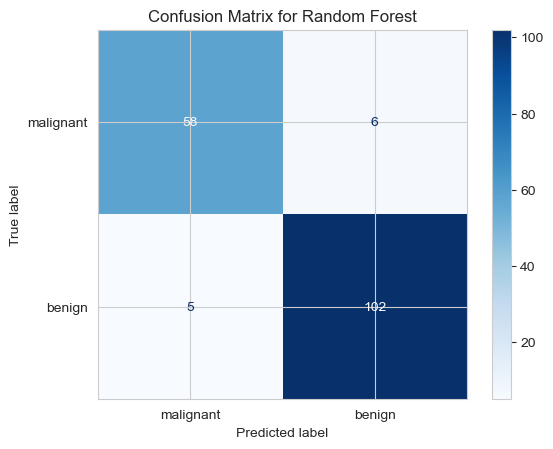

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_c, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()

#### ROC Curve and AUC

The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings. The Area Under the Curve (AUC) is a single number summary of the curve's performance. An AUC of 1 is perfect, while 0.5 is no better than random guessing.

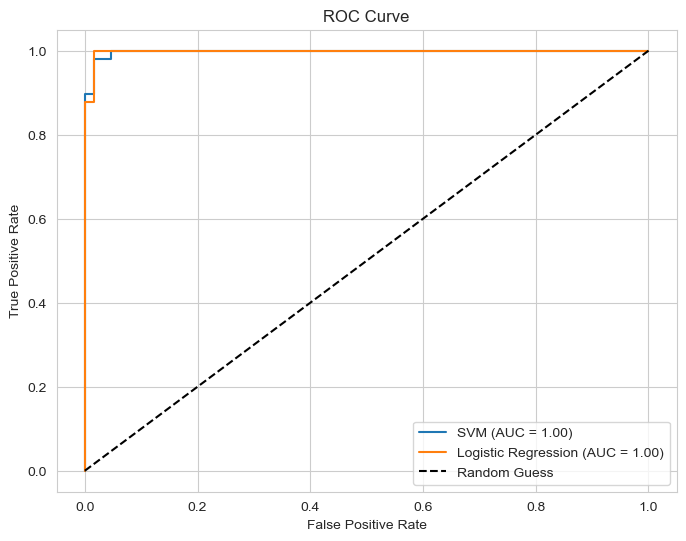

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities for the positive class (class 1)
y_pred_proba_svm = svm_clf.predict_proba(X_test_scaled_c)[:, 1]
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled_c)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test_c, y_pred_proba_svm)
fpr_lr, tpr_lr, _ = roc_curve(y_test_c, y_pred_proba_lr)

auc_svm = roc_auc_score(y_test_c, y_pred_proba_svm)
auc_lr = roc_auc_score(y_test_c, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

---

### 🔵 Regression

Regression is the task of predicting a continuous value. For these examples, we'll use the California Housing dataset.

In [53]:
from sklearn.datasets import fetch_california_housing

# Prepare data for regression models
housing = fetch_california_housing()
X_h, y_h = housing.data, housing.target

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_h, y_h, test_size=0.3, random_state=42
)

scaler_h = StandardScaler()
X_train_scaled_h = scaler_h.fit_transform(X_train_h)
X_test_scaled_h = scaler_h.transform(X_test_h)

#### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled_h, y_train_h)
y_pred_lin_reg = lin_reg.predict(X_test_scaled_h)

#### Ridge & Lasso Regression

These are regularized versions of Linear Regression that help prevent overfitting.
- **Ridge (L2 Regularization)**: Adds a penalty equal to the square of the magnitude of coefficients.
- **Lasso (L1 Regularization)**: Adds a penalty equal to the absolute value of the magnitude of coefficients. It can shrink some coefficients to exactly zero, effectively performing feature selection.

In [57]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_reg = Ridge(alpha=1.0, random_state=42)
ridge_reg.fit(X_train_scaled_h, y_train_h)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X_train_scaled_h, y_train_h)

Lasso(alpha=0.1, random_state=42)

#### Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_h, y_train_h) # No scaling needed

DecisionTreeRegressor(random_state=42)

#### Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_h, y_train_h) # No scaling needed

RandomForestRegressor(random_state=42)

### ✅ Evaluation Metrics (Regression)

- **Mean Squared Error (MSE)**: The average of the squared differences between predicted and actual values. Penalizes larger errors more.
- **Mean Absolute Error (MAE)**: The average of the absolute differences. Easier to interpret as it's in the same units as the target.
- **R² Score (Coefficient of Determination)**: The proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² of 1 indicates perfect prediction, while 0 means the model is no better than just predicting the mean of the target.

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Linear Regression
y_pred_lin = lin_reg.predict(X_test_scaled_h)
mse_lin = mean_squared_error(y_test_h, y_pred_lin)
r2_lin = r2_score(y_test_h, y_pred_lin)

print("Linear Regression Metrics:")
print(f"  R² Score: {r2_lin:.3f}")
print(f"  MSE: {mse_lin:.3f}\n")

# Evaluate Random Forest Regressor
y_pred_rf_reg = rf_reg.predict(X_test_h)
mse_rf = mean_squared_error(y_test_h, y_pred_rf_reg)
r2_rf = r2_score(y_test_h, y_pred_rf_reg)

print("Random Forest Regressor Metrics:")
print(f"  R² Score: {r2_rf:.3f}")
print(f"  MSE: {mse_rf:.3f}\n")

Linear Regression Metrics:
  R² Score: 0.596
  MSE: 0.531

Random Forest Regressor Metrics:
  R² Score: 0.805
  MSE: 0.257



---

## 🔄 5. Model Selection

How do we choose the best model and the best hyperparameters? Scikit-learn provides tools to automate this process and ensure our model generalizes well to new data.

### Cross-Validation (`cross_val_score`)

A single train-test split can be lucky or unlucky. K-Fold Cross-Validation splits the data into K 'folds', then trains the model K times, each time using a different fold as the test set and the remaining K-1 as the training set. The final score is the average of the K scores.

This gives a much more robust estimate of the model's performance.

In [63]:
from sklearn.model_selection import cross_val_score

# Use the Random Forest Classifier and the full (unsplit) cancer dataset
rf_clf_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
# cv=5 means 5 folds
# scoring='accuracy' is the metric to use
scores = cross_val_score(rf_clf_cv, X_cancer, y_cancer, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Average score: {scores.mean():.3f}")
print(f"Standard deviation: {scores.std():.3f}")

Cross-validation scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Average score: 0.956
Standard deviation: 0.023


### Grid Search (`GridSearchCV`)

Most models have hyperparameters that need to be tuned (e.g., `n_neighbors` in KNN, `C` and `gamma` in SVM). `GridSearchCV` exhaustively searches over a specified parameter grid to find the combination that gives the best cross-validated performance.

In [64]:
from sklearn.model_selection import GridSearchCV

# We will tune an SVM classifier
# We must use a pipeline to ensure scaling is done correctly within each CV fold
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# Define the parameter grid to search
param_grid = {
    'svm__C': [0.1, 1, 10, 100],            # Note the __ syntax: 'estimator__parameter'
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['rbf', 'linear']
}

# Instantiate GridSearchCV
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(pipe_svm, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit it to the data (this can take some time)
grid_search.fit(X_train_c, y_train_c)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# The grid_search object is now a trained model with the best parameters
print(f"Test set score with best parameters: {grid_search.score(X_test_c, y_test_c):.3f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters found: {'svm__C': 10, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
Best cross-validation score: 0.980
Test set score with best parameters: 0.971


### Random Search (`RandomizedSearchCV`)

`RandomizedSearchCV` is similar to Grid Search, but instead of trying every combination, it samples a fixed number of parameter settings from specified distributions. This is often more efficient, especially with a large hyperparameter space.

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions to sample from
param_dist = {
    'svm__C': uniform(loc=0.1, scale=100), # Uniform distribution from 0.1 to 100.1
    'svm__gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6)), # List of options
    'svm__kernel': ['rbf', 'poly', 'sigmoid']
}

# n_iter specifies how many parameter settings are sampled
random_search = RandomizedSearchCV(pipe_svm, param_distributions=param_dist, n_iter=50, 
                                 cv=5, n_jobs=-1, verbose=1, random_state=42, scoring='accuracy')

random_search.fit(X_train_c, y_train_c)

print(f"\nBest parameters found: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.3f}")
print(f"Test set score with best parameters: {random_search.score(X_test_c, y_test_c):.3f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found: {'svm__C': 15.701864044243651, 'svm__gamma': 0.001, 'svm__kernel': 'sigmoid'}
Best cross-validation score: 0.980
Test set score with best parameters: 0.965


### Overfitting vs Underfitting

- **Overfitting (High Variance)**: The model learns the training data too well, including its noise. It performs great on training data but poorly on unseen test data.
- **Underfitting (High Bias)**: The model is too simple to capture the underlying patterns in the data. It performs poorly on both training and test data.

**Learning Curves** help diagnose this. They plot the model's performance on the training and validation sets as a function of the training set size.

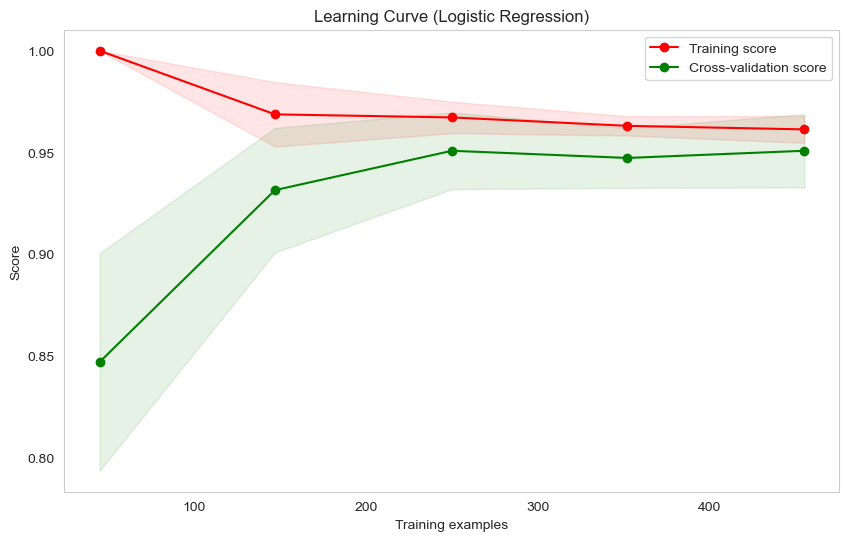

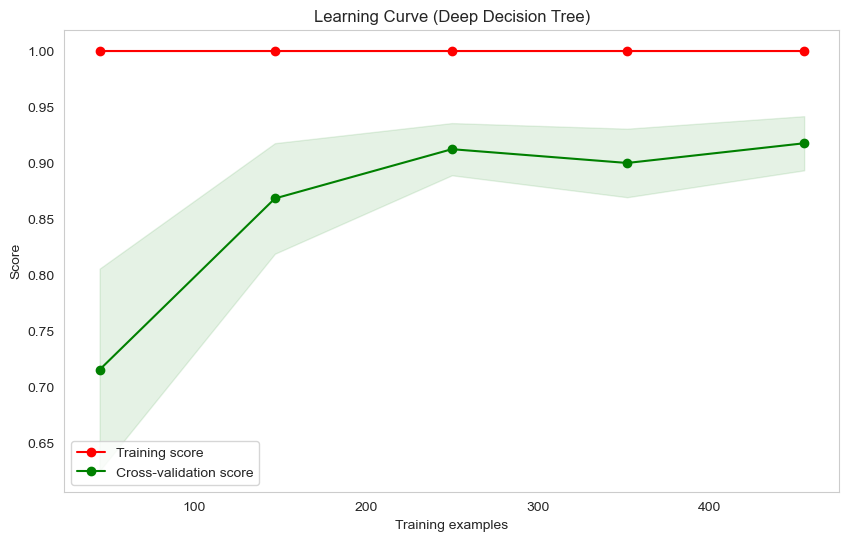

In [66]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# A simple model (underfitting example)
estimator_underfit = LogisticRegression(max_iter=10000, random_state=42)
plot_learning_curve(estimator_underfit, "Learning Curve (Logistic Regression)", X_cancer, y_cancer, cv=5)
plt.show()

# A complex model (potential for overfitting)
estimator_overfit = DecisionTreeClassifier(max_depth=10, random_state=42)
plot_learning_curve(estimator_overfit, "Learning Curve (Deep Decision Tree)", X_cancer, y_cancer, cv=5)
plt.show()

**Interpretation**:
- **Logistic Regression (High Bias)**: Both training and validation scores are low and converge. The model is too simple; adding more data won't help.
- **Decision Tree (High Variance)**: The training score is very high, but the validation score is much lower. There is a large gap. The model is overfitting. Adding more data could help the scores converge.

---

## 🧮 6. Unsupervised Learning

Unsupervised learning finds patterns in data without pre-existing labels. We'll explore clustering and dimensionality reduction.

In [67]:
# Generate some sample data for clustering
from sklearn.datasets import make_blobs, make_moons

X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)

# Scale the data
scaler = StandardScaler()
X_blobs_scaled = scaler.fit_transform(X_blobs)
X_moons_scaled = scaler.fit_transform(X_moons)

### K-Means Clustering

K-Means partitions data into *K* distinct, non-overlapping clusters. It works well when clusters are spherical and evenly sized.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


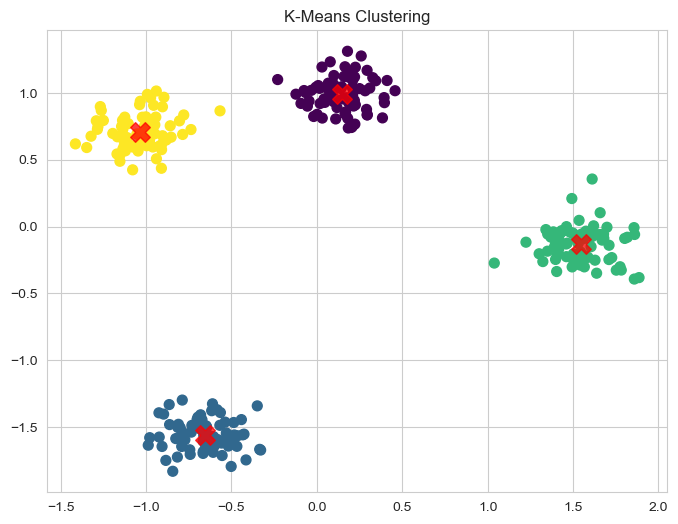

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_blobs_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_blobs_scaled[:, 0], X_blobs_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.show()

### Hierarchical Clustering

Builds a hierarchy of clusters, which can be visualized as a dendrogram. It doesn't require specifying the number of clusters beforehand.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Plot the dendrogram to find the optimal number of clusters
plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(sch.linkage(X_blobs_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Perform clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agg = agg_cluster.fit_predict(X_blobs_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_blobs_scaled[:, 0], X_blobs_scaled[:, 1], c=y_agg, s=50, cmap='plasma')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

### DBSCAN

Density-Based Spatial Clustering of Applications with Noise. It groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions. It can find arbitrarily shaped clusters and doesn't require the number of clusters to be specified.

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN is great for non-spherical clusters
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], c=y_dbscan, s=50, cmap='cividis')
plt.title('DBSCAN Clustering on Moons Dataset')
plt.show()
# Note: Cluster label -1 represents noise/outliers

### Principal Component Analysis (PCA)

PCA is a linear dimensionality reduction technique. It transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (the first principal component), the second greatest variance on the second coordinate, and so on. It's used for visualization, noise filtering, and feature extraction.

In [ ]:
from sklearn.decomposition import PCA

# Using the digits dataset for high-dimensional data
X_digits, y_digits = load_digits(return_X_y=True)
X_digits_scaled = StandardScaler().fit_transform(X_digits)

# Reduce from 64 dimensions to 2
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_digits_scaled)

print(f"Original shape: {X_digits_scaled.shape}")
print(f"Shape after PCA: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_):.3f}")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, cmap='jet', alpha=0.7)
plt.title('PCA of Digits Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))
plt.show()

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a non-linear technique primarily used for **data visualization**. It is excellent at revealing the underlying structure of data, such as clusters, but it should **not** be used for clustering itself, as the distances between clusters in a t-SNE plot are not meaningful.

In [ ]:
from sklearn.manifold import TSNE

# It's often a good idea to run PCA before t-SNE on high-dimensional data
pca_50 = PCA(n_components=50, random_state=42)
X_pca_50 = pca_50.fit_transform(X_digits_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_pca_50)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_digits, cmap='jet', alpha=0.7)
plt.title('t-SNE of Digits Dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))
plt.show()

---

## 🔧 7. Model Deployment Basics

Once you have a trained model, you need to save it so you can use it later for making predictions on new data. This process is called serialization.

`joblib` is generally preferred over `pickle` for scikit-learn objects because it is more efficient for objects that carry large NumPy arrays.

In [ ]:
import joblib

# Let's use our best model from GridSearchCV
best_model = grid_search.best_estimator_

# Save the model to a file
model_filename = 'final_cancer_classifier.joblib'
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")

### Inference Example with Saved Model

Now, let's pretend we are in a new script or application. We can load our saved model and use it to make predictions.

In [ ]:
# Load the model from the file
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")

# Let's take one sample from our original test set to simulate new data
new_data_point = X_test_c[0].reshape(1, -1) # Reshape to be a 2D array
actual_label = y_test_c[0]

# The loaded model is a pipeline, so it will handle scaling automatically
prediction = loaded_model.predict(new_data_point)
prediction_proba = loaded_model.predict_proba(new_data_point)

predicted_class_name = cancer.target_names[prediction[0]]
actual_class_name = cancer.target_names[actual_label]

print(f"\nNew Data Point Shape: {new_data_point.shape}")
print(f"Actual Label: {actual_class_name} (Class {actual_label})")
print(f"Predicted Label: {predicted_class_name} (Class {prediction[0]})")
print(f"Prediction Probabilities: {prediction_proba}")

---

## 📁 8. Real-world Dataset Example: Titanic

Let's put everything together in a mini-project. We'll use the famous Titanic dataset to predict passenger survival. This involves data loading, cleaning, preprocessing with a full pipeline, model training, and evaluation.

### Step 1: Load and Inspect Data

In [ ]:
# Load data from seaborn's repository for convenience
df_titanic = sns.load_dataset('titanic')

print("Titanic DataFrame Info:")
df_titanic.info()

print("\nFirst 5 rows:")
display(df_titanic.head())

### Step 2: Exploratory Data Analysis (EDA)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='survived', data=df_titanic, ax=axes[0])
axes[0].set_title('Survival Count')

sns.countplot(x='survived', hue='sex', data=df_titanic, ax=axes[1])
axes[1].set_title('Survival by Gender')

sns.countplot(x='survived', hue='pclass', data=df_titanic, ax=axes[2])
axes[2].set_title('Survival by Passenger Class')

plt.tight_layout()
plt.show()

### Step 3: Preprocessing and Pipeline Building

This is the most complex part. We will build a robust preprocessing pipeline using `ColumnTransformer` to handle different data types and missing values.

- **Numerical features**: Impute missing values (e.g., 'age') with the median, then scale them.
- **Categorical features**: Impute missing values (e.g., 'embarked') with the most frequent value, then one-hot encode them.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features (X) and target (y)
X = df_titanic.drop('survived', axis=1)
y = df_titanic['survived']

# We will drop 'deck', 'embark_town', 'alive' as they are redundant or have too many missing values
X = X.drop(['deck', 'embark_town', 'alive'], axis=1)

# Split data before any processing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical and categorical columns
numeric_features = ['age', 'fare', 'pclass', 'sibsp', 'parch']
categorical_features = ['sex', 'embarked', 'who', 'adult_male', 'alone']

# Create preprocessing pipelines for both data types
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

print("Preprocessing pipeline created successfully.")

### Step 4: Full Pipeline, Model Training, and Evaluation

In [ ]:
# Create the full pipeline by adding a classifier
titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
titanic_pipeline.fit(X_train, y_train)
print("Model training complete.")

# Make predictions
y_pred = titanic_pipeline.predict(X_test)

# Evaluate the model
accuracy = titanic_pipeline.score(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

## 🎉 Congratulations!

You have completed this comprehensive tour of the Scikit-Learn library. You've learned how to:

1.  Handle and prepare data.
2.  Perform exploratory data analysis.
3.  Train and evaluate a wide range of supervised and unsupervised models.
4.  Perform robust model selection with cross-validation and hyperparameter tuning.
5.  Diagnose model performance with learning curves.
6.  Save models for deployment.
7.  Apply these skills to a real-world problem from start to finish.

The next step is to practice these techniques on new datasets. Happy coding!